<a href="https://colab.research.google.com/github/noemi30600/ML-IoT-23/blob/main/IoT_23_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entrenamiento y evaluación de los modelos

Se realiza el entrenamiento de los modelos de clasificación: Árbol de decisión y Naive Bayes. El conjunto utilizado es el de los datos IoT-23 preprocesados en el cuaderno *IoT-23-Preprocess.*

In [ ]:
#Importamos bibliotecas y módulos necesarios
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [ ]:
filepath = "/content/drive/MyDrive/DataSets/IoT-23/preprocessed_iot23.csv"
df = pd.read_csv(filepath)
df.head()


,Unnamed: 0,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_S3,conn_state_SF,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,0,68.0,67.0,30.004642,8768.0,0.0,16.0,9216.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1,68.0,67.0,0.004564,0.0,3900.0,0.0,0.0,13.0,4264.0,...,False,False,True,False,True,False,False,False,False,False
2,2,5353.0,5353.0,3.948539,876.0,0.0,6.0,1164.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
3,3,5353.0,5353.0,3.768179,876.0,0.0,6.0,1164.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
4,4,5353.0,5353.0,0.000114,451.0,0.0,11.0,979.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label_encoded
count,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06
mean,3.464561e+04,2.428956e+03,2.918214e-01,1.274675e+01,4.763813e+01,1.144550e+00,6.239527e+01,7.581083e-02,5.147738e+01,9.329104e-01
std,1.835947e+04,9.643475e+03,6.297015e+01,2.748769e+04,1.221967e+05,4.656454e+01,2.778727e+04,8.725385e+01,1.269558e+05,2.501771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.913800e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.727200e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.938000e+04,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,9.328003e+04,7.554662e+07,3.365164e+08,1.236570e+05,7.606306e+07,2.394840e+05,3.496187e+08,1.000000e+00


In [ ]:
df['label_encoded'].value_counts()

,count
label_encoded,
1,7076259
0,508884


In [ ]:
df['detailed-label'].value_counts()

,count
detailed-label,
PartOfAHorizontalPortScan,7040929
-,508884
C&C,14944
DDoS,14394
Attack,5962
C&C-Torii,30


In [ ]:
#Crear 2 variables: una para las variables independientes con respecto a la columna 'label-encoded' (Maligno/Benigno)
#La segunda variables es para las variables independientes con respecto a la columna 'detailed-label' (tipos de ataques)
features1 = df[['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SHR']]

features2 =df[['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','label_encoded', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SHR']]

In [ ]:
#Creación de objeto clasificador del modelo de árbol de decisiones
ArbolD = DecisionTreeClassifier()

In [ ]:
#Se define la variable independiente (X) y la variable dependiente (Y)
X = features1
Y = df['label_encoded']

#Se dividen los datos en datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
#Empieza a contar el tiempo de entrenamiento
start = time.time()
print('Iniciando entrenamiento... \n')

#Inicia entrenamiento clasificador de árbol de decisiones
ArbolD.fit(X_train, Y_train)
print()

# Predice la respuesta para el conjunto de datos de prueba
print('Predicción: \n')
y_pred = ArbolD.predict(X_test)
print(y_pred)
print()

# Importa el módulo metrics de Scikit-learn
from sklearn import metrics

#Evalúa la exactitud del modelo de árbol de decisiónes
print('**ÁRBOL DE DECISIONES** \n')
score = ArbolD.score(X_test,Y_test)
print('Exactitud:', score)


# Evalúa la sensibilidad
print("Sensibilidad:", metrics.recall_score(Y_test, y_pred))

# Evalúa la puntuación F1
print("Puntuación F1:", metrics.f1_score(Y_test, y_pred))

end = time.time()
print('Fin del programa...\n')
print('Tiempo de entrenamiento: ')
print(end - start, 'segundos')

Iniciando entrenamiento... 


Predicción: 

[1 1 1 ... 1 1 0]

**ÁRBOL DE DECISIONES** 

Exactitud: 0.9939150800676849
Precisión: 0.9939150800676849
Sensibilidad: 0.9998190414995805
Puntuación F1: 0.9967474684621421
Fin del programa...

Tiempo de entrenamiento: 
12.692262172698975 segundos


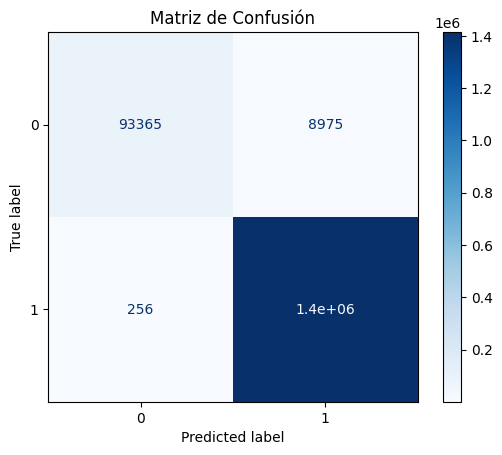

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred, labels=ArbolD.classes_)

# Visualizamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ArbolD.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    102340
           1       0.99      1.00      1.00   1414689

    accuracy                           0.99   1517029
   macro avg       1.00      0.96      0.97   1517029
weighted avg       0.99      0.99      0.99   1517029



In [ ]:
x = df[['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','label_encoded', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SHR']]
y = df['detailed-label']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('Iniciando entrenamiento...')
print()

ArbolD.fit(X_train, Y_train)
print()

print('Predicción:')
y_pred = ArbolD.predict(X_test)
print(y_pred)
print()

print('Score:')
score = ArbolD.score(X_test,Y_test)
print(score)

end = time.time()
print('Fin del programa...')
print()
print('Tiempo de entrenamiento: ')
print(end - start, 'seconds')

Iniciando entrenamiento...


Predicción:
[1 1 1 ... 1 1 0]

Score:
0.9939163984340444
Fin del programa...

Tiempo de entrenamiento: 
9.569167137145996 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    102340
           1       0.99      1.00      1.00   1414689

    accuracy                           0.99   1517029
   macro avg       1.00      0.96      0.97   1517029
weighted avg       0.99      0.99      0.99   1517029



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x = df[['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','label_encoded', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SHR']]
y = df['detailed-label']
scaler.fit(x)
normalized_x = scaler.transform(x)
normalized_x

array([[3.21662007e-04, 1.16060779e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.89279426e-08, 0.00000000e+00, 1.15893328e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.23299495e-05, 1.15954884e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, Y_train, Y_test = train_test_split(normalized_x, y, random_state=100, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


0.9643164369303422

['PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan'
 'PartOfAHorizontalPortScan' ... '-' '-' 'PartOfAHorizontalPortScan']

program end...

time cost: 
50.26902770996094 seconds


In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                        -       1.00      1.00      1.00    102057
                   Attack       0.46      1.00      0.63      1193
                      C&C       0.03      0.42      0.05      3027
                C&C-Torii       0.00      0.20      0.00         5
                     DDoS       1.00      0.99      0.99      2776
PartOfAHorizontalPortScan       1.00      0.96      0.98   1407971

                 accuracy                           0.96   1517029
                macro avg       0.58      0.76      0.61   1517029
             weighted avg       1.00      0.96      0.98   1517029



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
normalized_X = scaler.transform(X)
normalized_X

array([[3.21662007e-04, 1.16060779e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.89279426e-08, 0.00000000e+00, 1.15893328e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.23299495e-05, 1.15954884e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
#Importa módulo de Gaussian para el modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Creación de objeto clasificador del modelo de Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
#Empieza conteo del entrenamiento
start = time.time()
print('Iniciando entrenamiento... \n')

#Inicio de clasificador de Naive Bayes
clf = GaussianNB().fit(X_train, Y_train)

#Predice la respuesta para el conjunto de prueba
y_pred = clf.predict(X_test)
print(y_pred)
print()


#Importa módulo metrics de Scikit-learn
from sklearn import metrics

#Evalúa la exactitud del modelo de Naive Bayes
print('**NAIVE BAYES** \n')
score = clf.score(X_test,Y_test)
print('Exactitud:', score)


#Evalúa la sensibilidad
print("Sensibilidad:", metrics.recall_score(Y_test, y_pred, average='weighted'))

#Evalúa la puntuación F1
print("Puntuación F1:", metrics.f1_score(Y_test, y_pred, average='weighted'))

end = time.time()
print('Fin del programa...\n')
print('Tiempo de entrenamiento: ')
print(end - start, 'segundos')


Iniciando entrenamiento... 

[1 1 1 ... 1 1 1]

**NAIVE BAYES** 

Exactitud: 0.9316011757191194
Precisión: 0.9316011757191194
Sensibilidad: 0.9316011757191194
Puntuación F1: 0.8997416909614838
Fin del programa...

Tiempo de entrenamiento: 
14.032846212387085 segundos


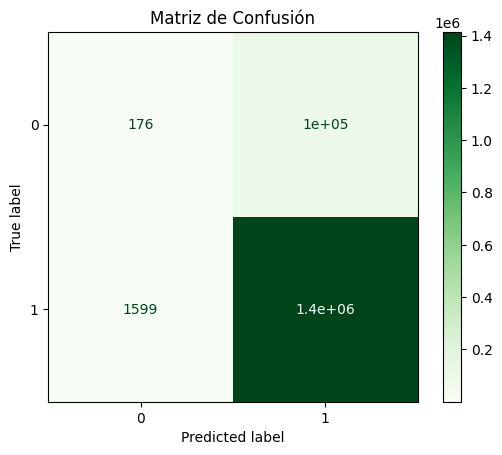

In [ ]:
# Calculamos la matriz de confusión
Cm = confusion_matrix(Y_test, y_pred, labels=clf.classes_)

# Visualizamos la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=Cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#print("Classifiction Report :")
#print(classification_report(Y_test, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

           0       0.94      0.92      0.93    102057
           1       0.99      1.00      0.99   1414972

    accuracy                           0.99   1517029
   macro avg       0.96      0.96      0.96   1517029
weighted avg       0.99      0.99      0.99   1517029



**NOTA:** Código para el entrenamiento con SVC (Support Vector Classifier). No se terminó de ejecutar. Su tiempo asciende a más de 10 horas.

In [ ]:
SVM_classifier = SVC()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [ ]:
start = time.time()
print('program start...')
print()

SVM_classifier = SVC(C=1.0, cache_size=1500, verbose=True).fit(X_train, Y_train)
print()
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

[LibSVM]

In [ ]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))